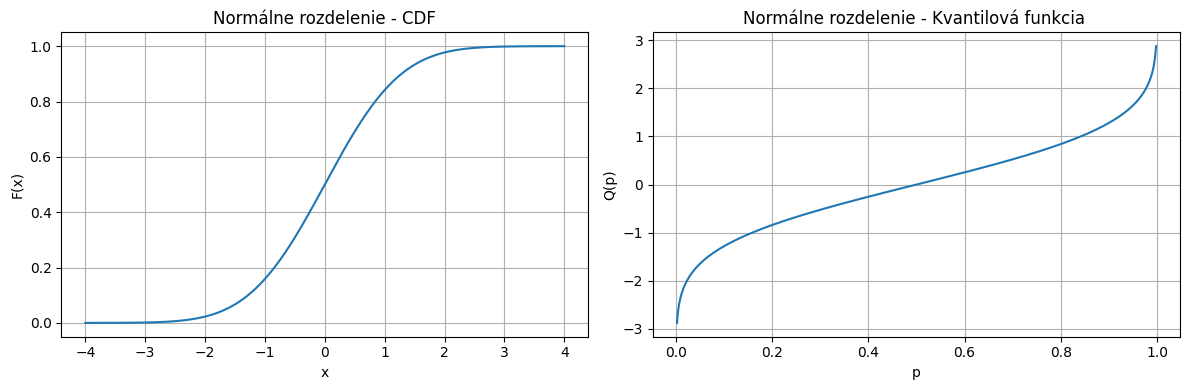

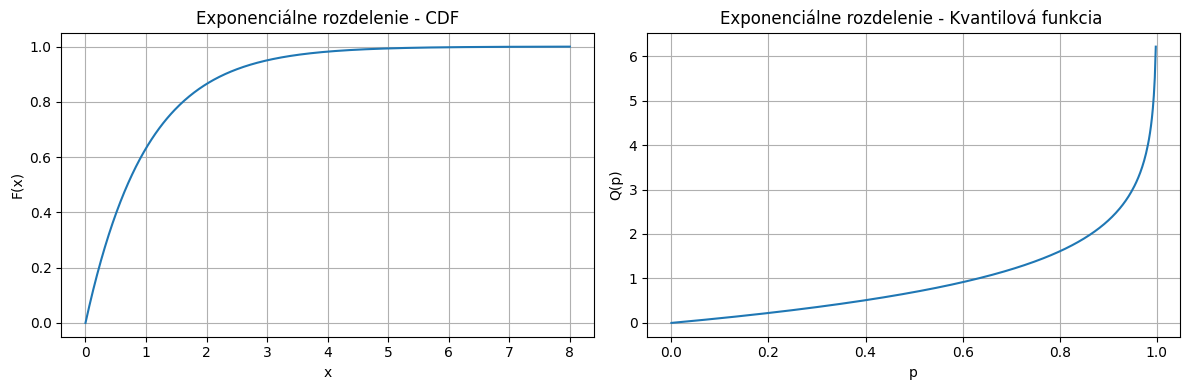

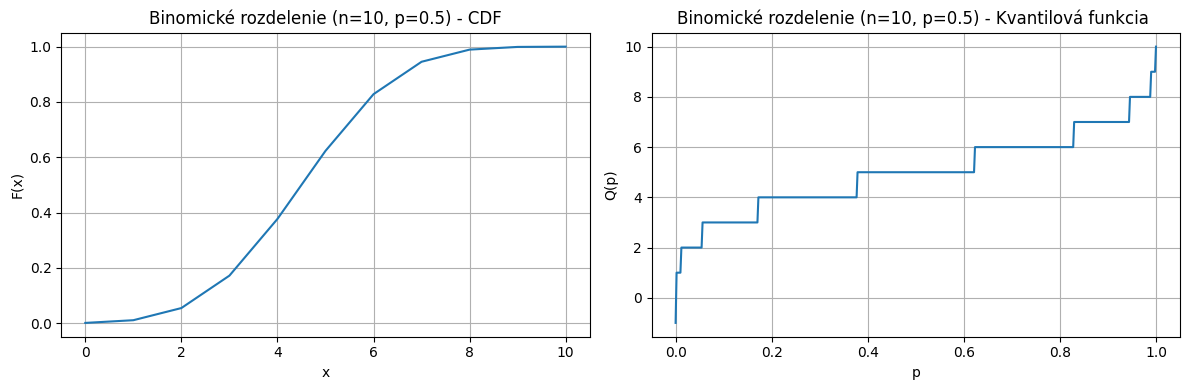

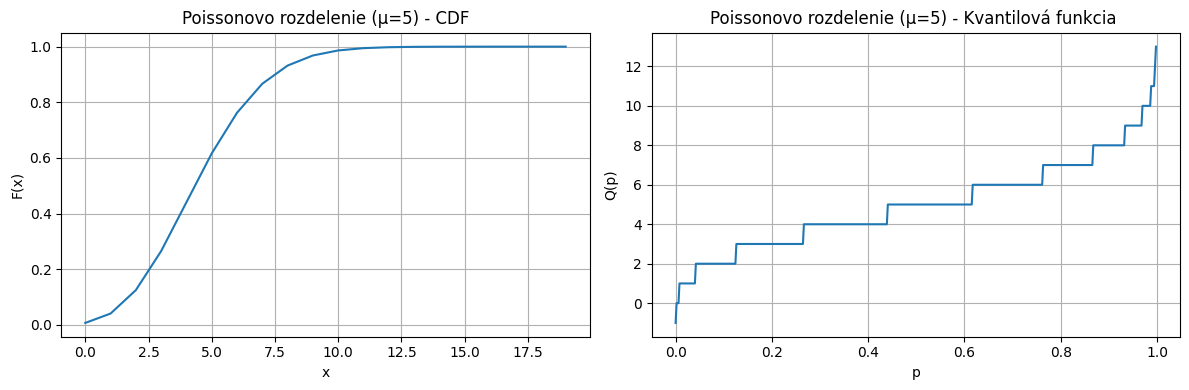

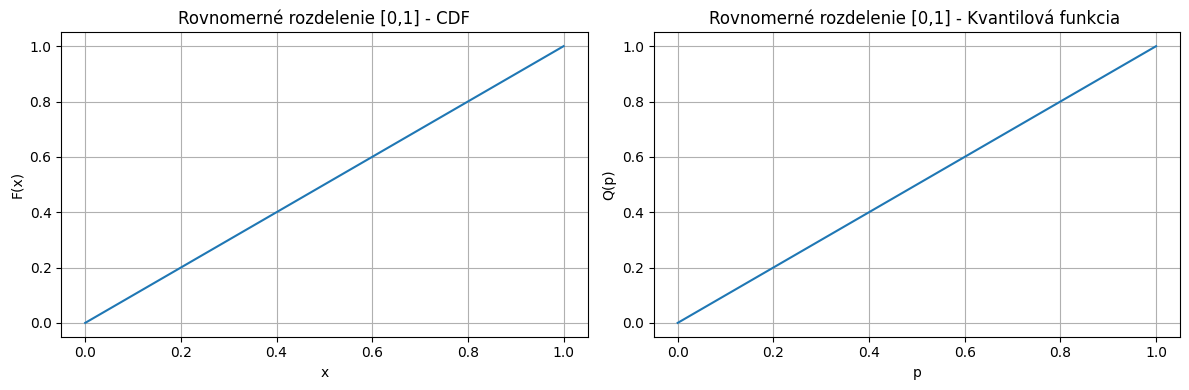

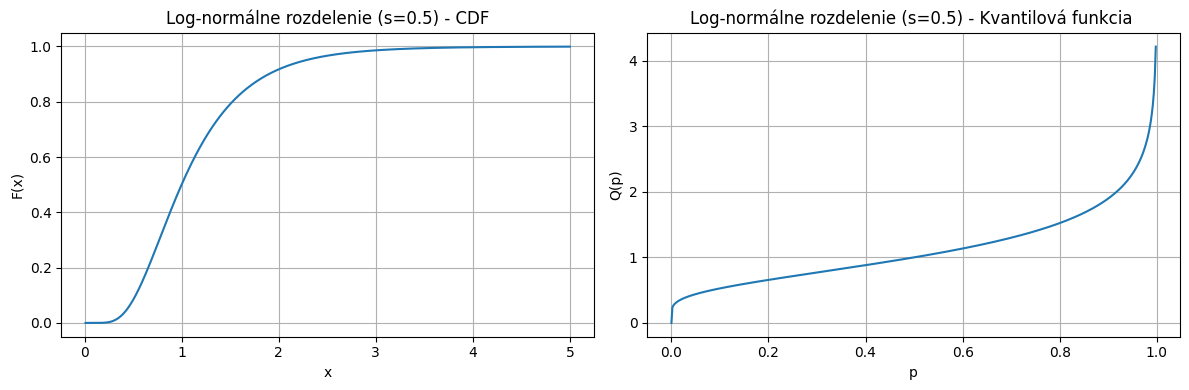

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, expon, binom, poisson, uniform, lognorm

# Nastavenie rozsahov pre kreslenie
x_norm = np.linspace(-4, 4, 500)
x_expon = np.linspace(0, 8, 500)
x_binom = np.arange(0, 11)
x_poisson = np.arange(0, 20)
x_uniform = np.linspace(0, 1, 500)
x_lognorm = np.linspace(0.01, 5, 500)

p = np.linspace(0, 1, 500)

# Funkcia na kreslenie CDF a kvantilovej funkcie
def plot_distribution_cdf_ppf(dist, x, p, title):
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))

    # CDF
    axs[0].plot(x, dist.cdf(x))
    axs[0].set_title(f'{title} - CDF')
    axs[0].set_xlabel('x')
    axs[0].set_ylabel('F(x)')
    axs[0].grid(True)

    # PPF
    axs[1].plot(p, dist.ppf(p))
    axs[1].set_title(f'{title} - Kvantilová funkcia ')
    axs[1].set_xlabel('p')
    axs[1].set_ylabel('Q(p)')
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()

# Normálne rozdelenie
plot_distribution_cdf_ppf(norm(loc=0, scale=1), x_norm, p, 'Normálne rozdelenie')

# Exponenciálne rozdelenie
plot_distribution_cdf_ppf(expon(scale=1), x_expon, p, 'Exponenciálne rozdelenie')

# Binomické rozdelenie (n=10, p=0.5)
plot_distribution_cdf_ppf(binom(n=10, p=0.5), x_binom, p, 'Binomické rozdelenie (n=10, p=0.5)')

# Poissonovo rozdelenie (μ=5)
plot_distribution_cdf_ppf(poisson(mu=5), x_poisson, p, 'Poissonovo rozdelenie (μ=5)')

# Rovnomerné rozdelenie na [0,1]
plot_distribution_cdf_ppf(uniform(loc=0, scale=1), x_uniform, p, 'Rovnomerné rozdelenie [0,1]')

# Log-normálne rozdelenie (s=0.5)
plot_distribution_cdf_ppf(lognorm(s=0.5, scale=np.exp(0)), x_lognorm, p, 'Log-normálne rozdelenie (s=0.5)')


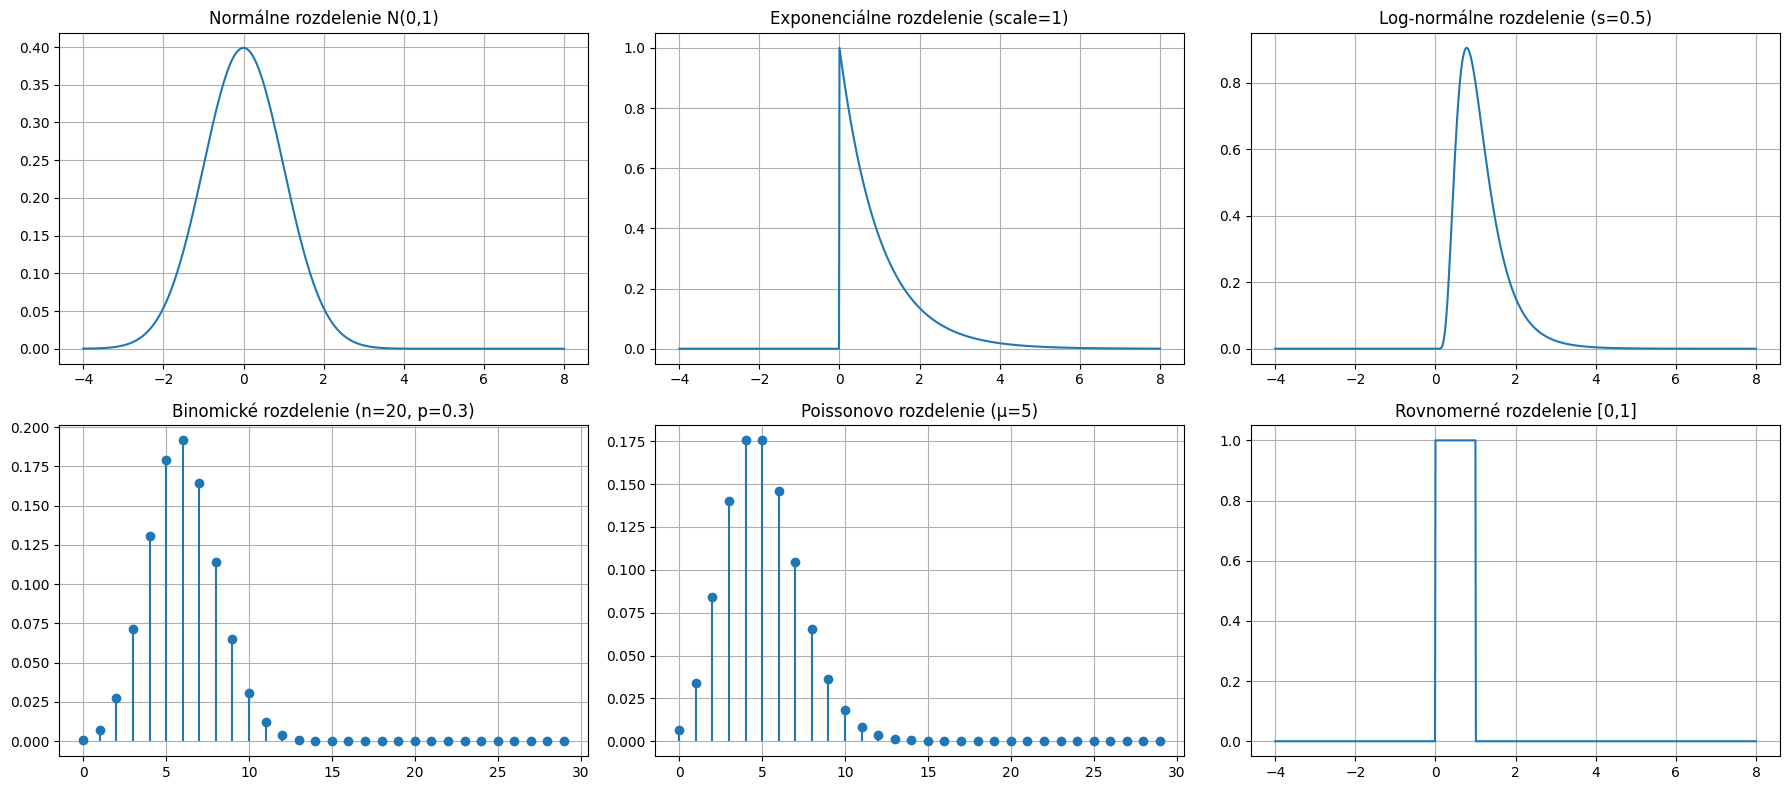

In [ ]:
# Vytvorenie rozsahov
x = np.linspace(-4, 8, 1000)
x_discrete = np.arange(0, 30)

# Hustoty pravdepodobnosti (PDF alebo PMF)
pdf_norm = norm.pdf(x)
pdf_expon = expon.pdf(x, loc=0, scale=1)
pdf_lognorm = lognorm.pdf(x, s=0.5, loc=0, scale=1)
pdf_uniform = uniform.pdf(x, loc=0, scale=1)
pmf_binom = binom.pmf(x_discrete, n=20, p=0.3)
pmf_poisson = poisson.pmf(x_discrete, mu=5)

# Vykreslenie
fig, axs = plt.subplots(2, 3, figsize=(18, 8))

# Normálne
axs[0, 0].plot(x, pdf_norm)
axs[0, 0].set_title("Normálne rozdelenie N(0,1)")

# Exponenciálne
axs[0, 1].plot(x, pdf_expon)
axs[0, 1].set_title("Exponenciálne rozdelenie (scale=1)")

# Log-normálne
axs[0, 2].plot(x, pdf_lognorm)
axs[0, 2].set_title("Log-normálne rozdelenie (s=0.5)")

# Binomické
axs[1, 0].stem(x_discrete, pmf_binom, basefmt=" ")
axs[1, 0].set_title("Binomické rozdelenie (n=20, p=0.3)")

# Poissonovo
axs[1, 1].stem(x_discrete, pmf_poisson, basefmt=" ")
axs[1, 1].set_title("Poissonovo rozdelenie (μ=5)")

# Rovnomerné
axs[1, 2].plot(x, pdf_uniform)
axs[1, 2].set_title("Rovnomerné rozdelenie [0,1]")

for ax in axs.flat:
    ax.grid(True)

plt.tight_layout()
plt.show()

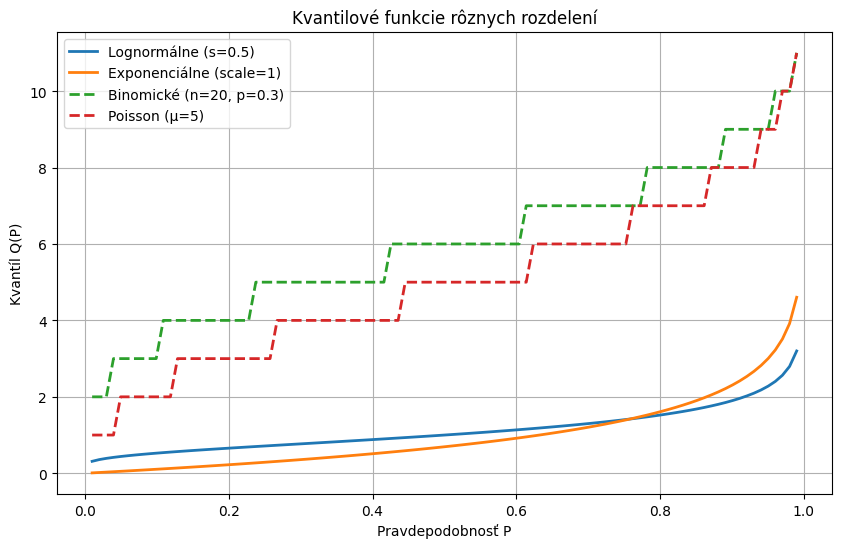

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm, expon, binom, poisson

# Úrovne pravdepodobnosti pre spojité rozdelenia
pravd_spojite = np.linspace(0.01, 0.99, 100)

# Kvantily pre spojité rozdelenia
tvar = 0.5  # parameter pre log-normálne rozdelenie (shape)
kvantily_lognorm = lognorm.ppf(pravd_spojite, tvar, loc=0, scale=1)
kvantily_expon = expon.ppf(pravd_spojite, loc=0, scale=1)

# Úrovne pravdepodobnosti pre diskrétne rozdelenia
pravd_bin = np.linspace(0.01, 0.99, 100)
pravd_poiss = np.linspace(0.01, 0.99, 100)

# Kvantily pre diskrétne rozdelenia
kvantily_binom = binom.ppf(pravd_bin, n=20, p=0.3)
kvantily_poisson = poisson.ppf(pravd_poiss, mu=5)

# Vykreslenie
plt.figure(figsize=(10, 6))
plt.plot(pravd_spojite, kvantily_lognorm, label='Lognormálne (s=0.5)', lw=2)
plt.plot(pravd_spojite, kvantily_expon, label='Exponenciálne (scale=1)', lw=2)
plt.plot(pravd_bin, kvantily_binom, label='Binomické (n=20, p=0.3)', lw=2, linestyle='--')
plt.plot(pravd_poiss, kvantily_poisson, label='Poisson (μ=5)', lw=2, linestyle='--')

plt.title('Kvantilové funkcie rôznych rozdelení')
plt.xlabel('Pravdepodobnosť P')
plt.ylabel('Kvantíl Q(P)')
plt.legend()
plt.grid(True)
plt.show()


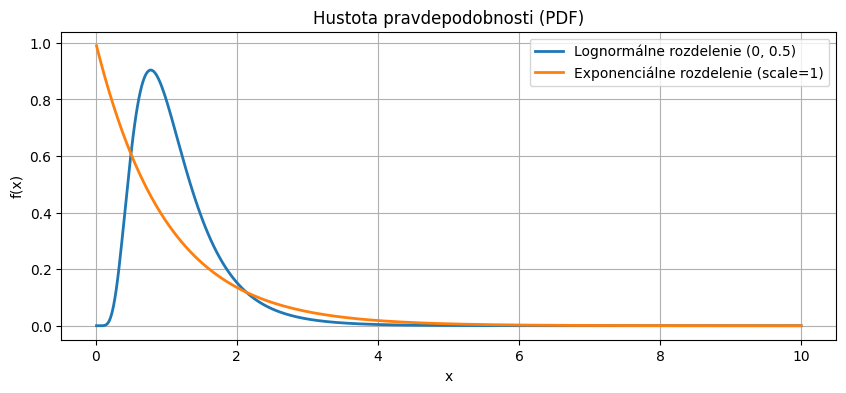

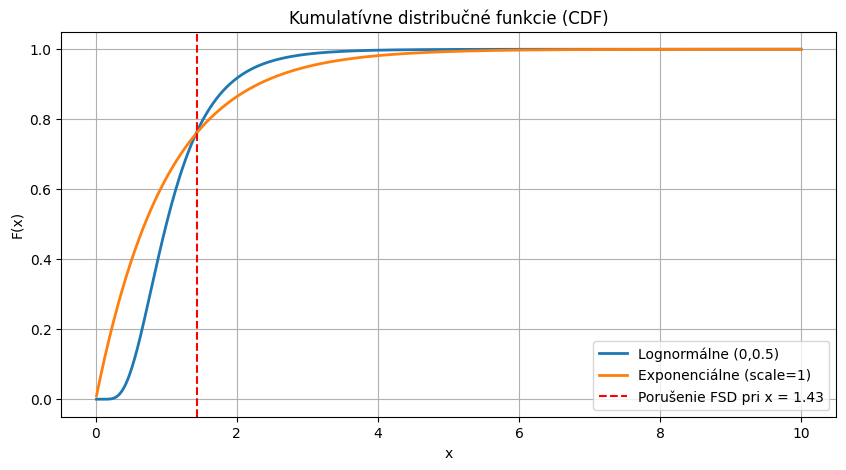

❌ Žiadna FSD dominancia – prvé porušenie pri x = 1.43


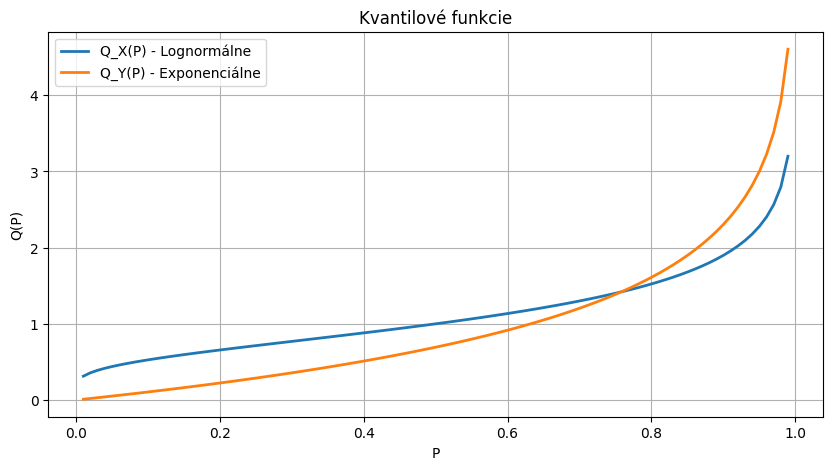

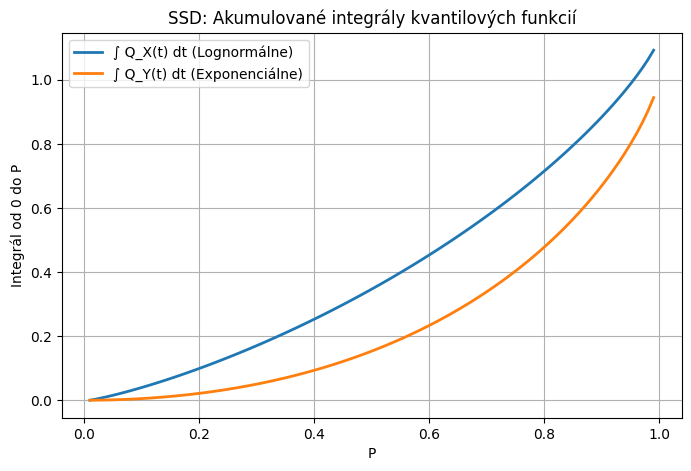

✅ Exponenciálne rozdelenie SSD-dominuje lognormálnemu.


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm, expon

# ----------------------------
# Parametre rozdelení
# ----------------------------
s = 0.5             # parameter lognormálneho rozdelenia (σ)
scale_y = 1.0       # parameter exponenciálneho rozdelenia (scale = 1/λ)

# Mreže
x = np.linspace(0.01, 10, 500)       # pre PDF a CDF
P = np.linspace(0.01, 0.99, 100)     # pre kvantilové funkcie

# ----------------------------
# PDF (hustota pravdepodobnosti)
# ----------------------------
pdf_X = lognorm.pdf(x, s, loc=0, scale=1)
pdf_Y = expon.pdf(x, loc=0, scale=scale_y)

plt.figure(figsize=(10, 4))
plt.plot(x, pdf_X, label='Lognormálne rozdelenie (0, 0.5)', lw=2)
plt.plot(x, pdf_Y, label='Exponenciálne rozdelenie (scale=1)', lw=2)
plt.title('Hustota pravdepodobnosti (PDF)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

# ----------------------------
# CDF ( distribučná funkcia)
# ----------------------------
F_X = lognorm.cdf(x, s, loc=0, scale=1)
F_Y = expon.cdf(x, loc=0, scale=scale_y)

plt.figure(figsize=(10, 5))
plt.plot(x, F_X, label='Lognormálne (0,0.5)', lw=2)
plt.plot(x, F_Y, label='Exponenciálne (scale=1)', lw=2)
plt.title('Distribučné funkcie (CDF)')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.legend()
plt.grid(True)

# --- Zistenie bodu porušenia FSD ---
diff_cdf = F_X - F_Y
violation_indices = np.where(diff_cdf > 1e-8)[0]

if len(violation_indices) > 0:
    first_violation_x = x[violation_indices[0]]
    plt.axvline(first_violation_x, color='red', linestyle='--', label=f'Porušenie FSD pri x = {first_violation_x:.2f}')
    plt.legend()
    plt.show()
    print(f" Žiadna FSD dominancia – prvé porušenie pri x = {first_violation_x:.2f}")
else:
    plt.show()
    print(" FSD podmienka je splnená pre všetky x.")

# ----------------------------
# Kvantilové funkcie (inverzné CDF)
# ----------------------------
Q_X = lognorm.ppf(P, s, loc=0, scale=1)
Q_Y = expon.ppf(P, loc=0, scale=scale_y)

plt.figure(figsize=(10, 5))
plt.plot(P, Q_X, label='Q_X(P) - Lognormálne', lw=2)
plt.plot(P, Q_Y, label='Q_Y(P) - Exponenciálne', lw=2)
plt.title('Kvantilové funkcie')
plt.xlabel('P')
plt.ylabel('Q(P)')
plt.legend()
plt.grid(True)
plt.show()

# ----------------------------
# SSD graf:  integrály kvantilových funkcií
# ----------------------------
int_X = np.array([np.trapezoid(Q_X[:i+1], P[:i+1]) for i in range(len(P))])
int_Y = np.array([np.trapezoid(Q_Y[:i+1], P[:i+1]) for i in range(len(P))])

plt.figure(figsize=(8, 5))
plt.plot(P, int_X, label='∫ Q_X(t) dt (Lognormálne)', lw=2)
plt.plot(P, int_Y, label='∫ Q_Y(t) dt (Exponenciálne)', lw=2)
plt.title('SSD:integrály kvantilových funkcií')
plt.xlabel('P')
plt.ylabel('Integrál od 0 do P')
plt.legend()
plt.grid(True)
plt.show()

# ----------------------------
# FORMÁLNE VYHODNOTENIE SSD
# ----------------------------
diff_integrals = int_X - int_Y

if np.all(diff_integrals <= 1e-8):
    print(" Lognormálne rozdelenie SSD-dominuje exponenciálnemu.")
elif np.all(diff_integrals >= -1e-8):
    print(" Exponenciálne rozdelenie SSD-dominuje lognormálnemu.")
else:
    print(" Žiadna SSD dominancia medzi rozdeleniami.")


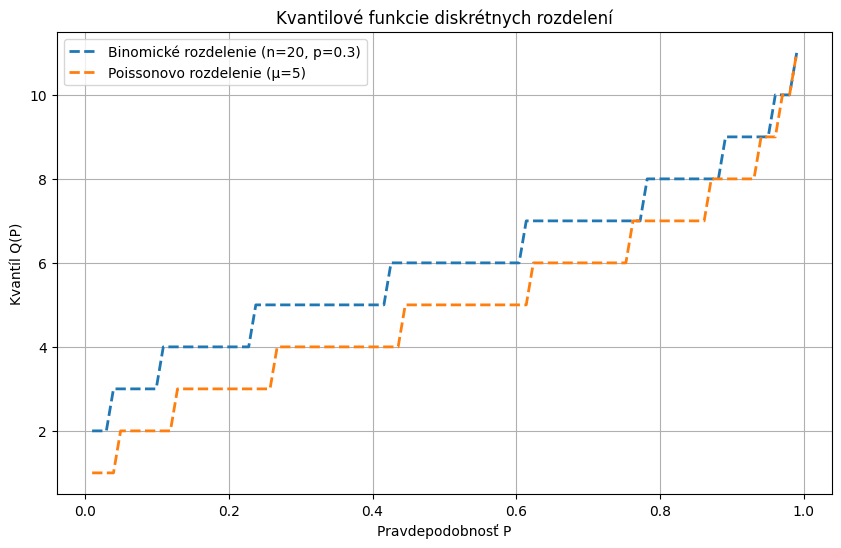

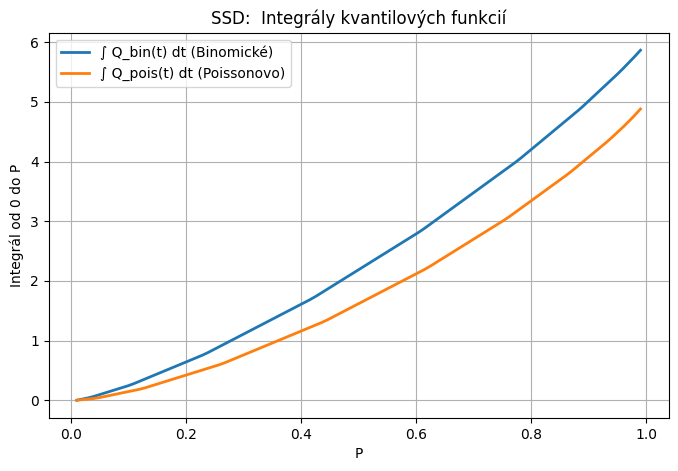

 Poissonovo rozdelenie SSD-dominuje Binomickému.


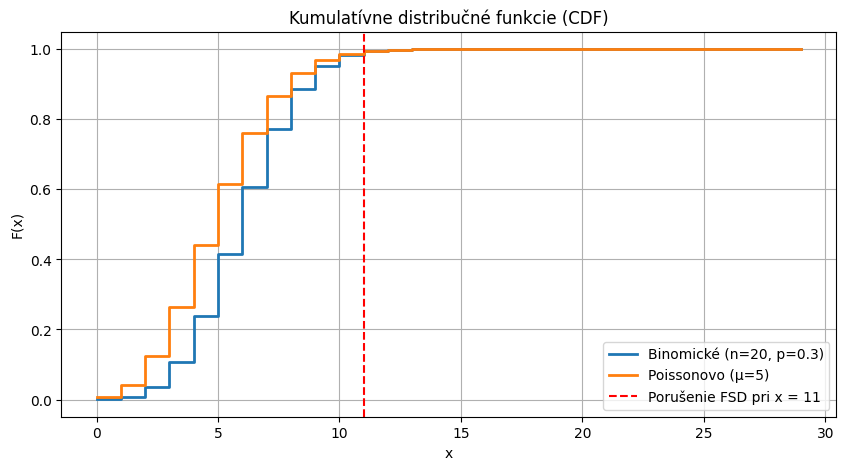

 Žiadna FSD dominancia – prvé porušenie pri x = 11


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, poisson

# Mreža pravdepodobností pre kvantilové funkcie
P_bin = np.linspace(0.01, 0.99, 100)
P_pois = np.linspace(0.01, 0.99, 100)

# Kvantilové funkcie pre diskrétne rozdelenia
binom_q = binom.ppf(P_bin, n=20, p=0.3)
poisson_q = poisson.ppf(P_pois, mu=5)

# --- Graf kvantilových funkcií ---
plt.figure(figsize=(10, 6))
plt.plot(P_bin, binom_q, label='Binomické rozdelenie (n=20, p=0.3)', lw=2, linestyle='--')
plt.plot(P_pois, poisson_q, label='Poissonovo rozdelenie (μ=5)', lw=2, linestyle='--')
plt.title('Kvantilové funkcie diskrétnych rozdelení')
plt.xlabel('Pravdepodobnosť P')
plt.ylabel('Kvantíl Q(P)')
plt.legend()
plt.grid(True)
plt.show()

# --- SSD graf: integrály kvantilových funkcií ---
int_binom = np.array([np.trapezoid(binom_q[:i+1], P_bin[:i+1]) for i in range(len(P_bin))])
int_poisson = np.array([np.trapezoid(poisson_q[:i+1], P_pois[:i+1]) for i in range(len(P_pois))])

plt.figure(figsize=(8, 5))
plt.plot(P_bin, int_binom, label='∫ Q_bin(t) dt (Binomické)', lw=2)
plt.plot(P_pois, int_poisson, label='∫ Q_pois(t) dt (Poissonovo)', lw=2)
plt.title('SSD:  Integrály kvantilových funkcií')
plt.xlabel('P')
plt.ylabel('Integrál od 0 do P')
plt.legend()
plt.grid(True)
plt.show()

# --- FORMÁLNE VYHODNOTENIE SSD ---
diff_integrals = int_binom - int_poisson

if np.all(diff_integrals <= 1e-8):
    print(" Binomické rozdelenie SSD-dominuje Poissonovému.")
elif np.all(diff_integrals >= -1e-8):
    print(" Poissonovo rozdelenie SSD-dominuje Binomickému.")
else:
    print(" Žiadna SSD dominancia medzi rozdeleniami.")

# --- CDF pre FSD ---
x_vals = np.arange(0, 30)
cdf_binom = binom.cdf(x_vals, n=20, p=0.3)
cdf_poisson = poisson.cdf(x_vals, mu=5)

# Graf CDF funkcií
plt.figure(figsize=(10, 5))
plt.step(x_vals, cdf_binom, where='post', label='Binomické (n=20, p=0.3)', lw=2)
plt.step(x_vals, cdf_poisson, where='post', label='Poissonovo (μ=5)', lw=2)
plt.title('é funkcie (CDF)')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.grid(True)
plt.legend()

# --- Zistenie bodu porušenia FSD ---
diff_cdf = cdf_binom - cdf_poisson
violation_indices = np.where(diff_cdf > 1e-8)[0]

if len(violation_indices) > 0:
    first_violation_x = x_vals[violation_indices[0]]
    plt.axvline(first_violation_x, color='red', linestyle='--', label=f'Porušenie FSD pri x = {first_violation_x}')
    plt.legend()
    plt.show()
    print(f" Žiadna FSD dominancia – prvé porušenie pri x = {first_violation_x}")
else:
    plt.show()
    print(" FSD podmienka je splnená pre všetky x.")


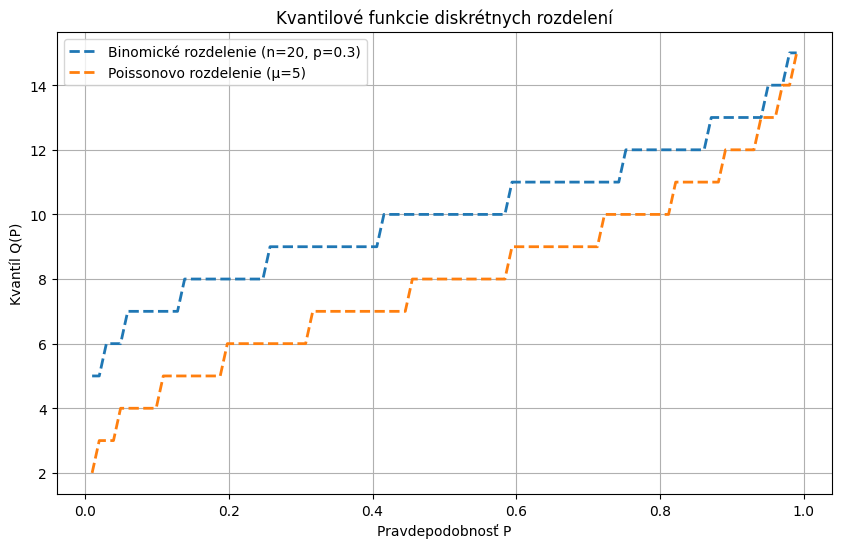

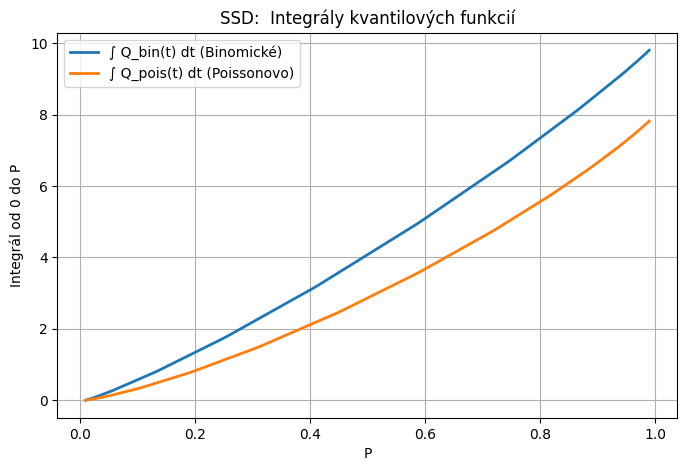

 Poissonovo rozdelenie SSD-dominuje Binomickému.


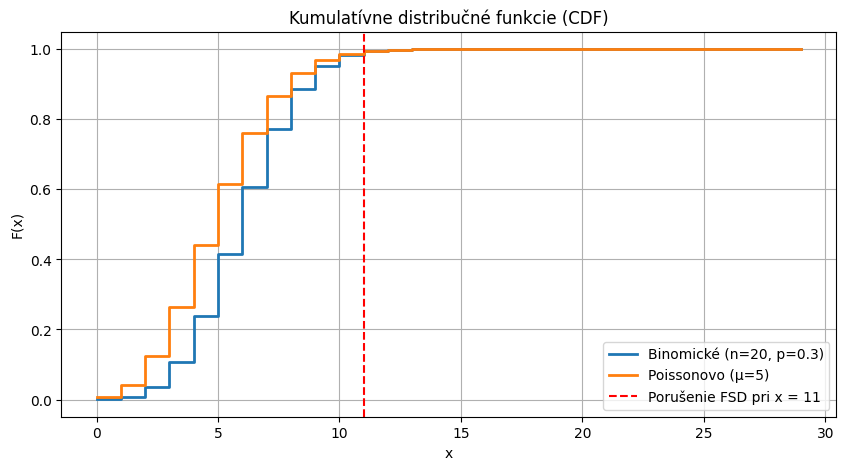

 Žiadna FSD dominancia – prvé porušenie pri x = 11


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, poisson

# Mreža pravdepodobností pre kvantilové funkcie
P_bin = np.linspace(0.01, 0.99, 100)
P_pois = np.linspace(0.01, 0.99, 100)

# Kvantilové funkcie pre diskrétne rozdelenia
binom_q = binom.ppf(P_bin, n=20, p=0.5)
poisson_q = poisson.ppf(P_pois, mu=8)

# --- Graf kvantilových funkcií ---
plt.figure(figsize=(10, 6))
plt.plot(P_bin, binom_q, label='Binomické rozdelenie (n=20, p=0.3)', lw=2, linestyle='--')
plt.plot(P_pois, poisson_q, label='Poissonovo rozdelenie (μ=5)', lw=2, linestyle='--')
plt.title('Kvantilové funkcie diskrétnych rozdelení')
plt.xlabel('Pravdepodobnosť P')
plt.ylabel('Kvantíl Q(P)')
plt.legend()
plt.grid(True)
plt.show()

# --- SSD graf: integrály kvantilových funkcií ---
int_binom = np.array([np.trapezoid(binom_q[:i+1], P_bin[:i+1]) for i in range(len(P_bin))])
int_poisson = np.array([np.trapezoid(poisson_q[:i+1], P_pois[:i+1]) for i in range(len(P_pois))])

plt.figure(figsize=(8, 5))
plt.plot(P_bin, int_binom, label='∫ Q_bin(t) dt (Binomické)', lw=2)
plt.plot(P_pois, int_poisson, label='∫ Q_pois(t) dt (Poissonovo)', lw=2)
plt.title('SSD:  Integrály kvantilových funkcií')
plt.xlabel('P')
plt.ylabel('Integrál od 0 do P')
plt.legend()
plt.grid(True)
plt.show()

# --- FORMÁLNE VYHODNOTENIE SSD ---
diff_integrals = int_binom - int_poisson

if np.all(diff_integrals <= 1e-8):
    print(" Binomické rozdelenie SSD-dominuje Poissonovému.")
elif np.all(diff_integrals >= -1e-8):
    print(" Poissonovo rozdelenie SSD-dominuje Binomickému.")
else:
    print(" Žiadna SSD dominancia medzi rozdeleniami.")

# --- CDF pre FSD ---
x_vals = np.arange(0, 30)
cdf_binom = binom.cdf(x_vals, n=20, p=0.3)
cdf_poisson = poisson.cdf(x_vals, mu=5)

# Graf CDF funkcií
plt.figure(figsize=(10, 5))
plt.step(x_vals, cdf_binom, where='post', label='Binomické (n=20, p=0.3)', lw=2)
plt.step(x_vals, cdf_poisson, where='post', label='Poissonovo (μ=5)', lw=2)
plt.title(' distribučné funkcie (CDF)')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.grid(True)
plt.legend()

# --- Zistenie bodu porušenia FSD ---
diff_cdf = cdf_binom - cdf_poisson
violation_indices = np.where(diff_cdf > 1e-8)[0]

if len(violation_indices) > 0:
    first_violation_x = x_vals[violation_indices[0]]
    plt.axvline(first_violation_x, color='red', linestyle='--', label=f'Porušenie FSD pri x = {first_violation_x}')
    plt.legend()
    plt.show()
    print(f" Žiadna FSD dominancia – prvé porušenie pri x = {first_violation_x}")
else:
    plt.show()
    print(" FSD podmienka je splnená pre všetky x.")


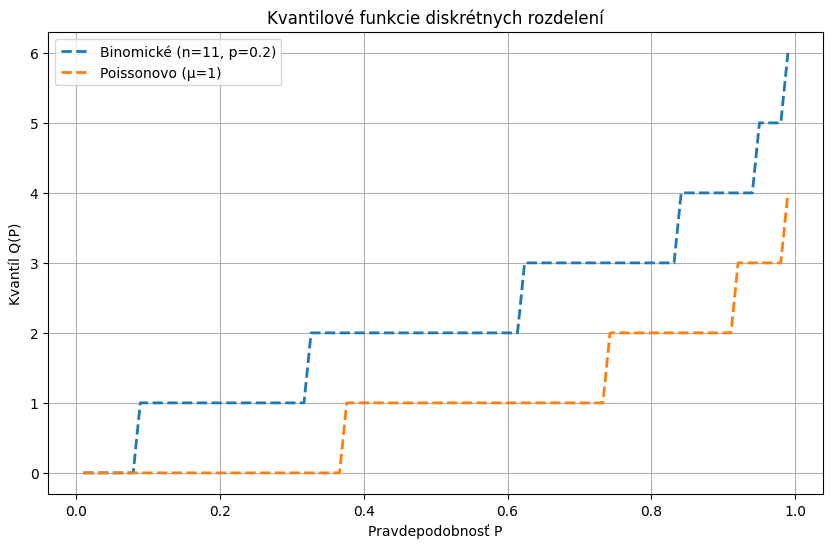

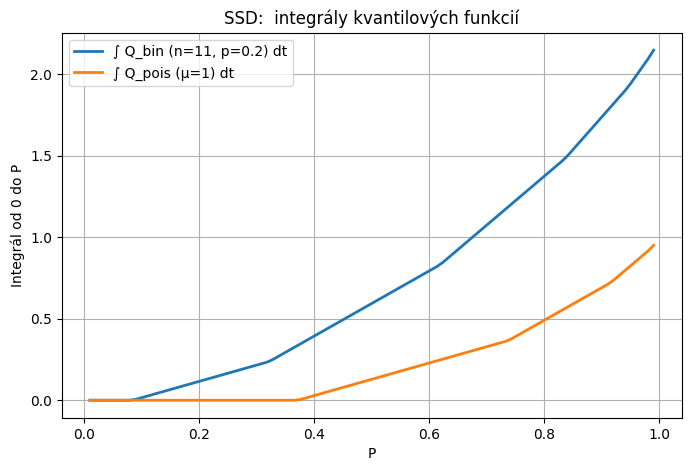

Poisson(μ=1) SSD-dominuje Binom(n=11, p=0.2).


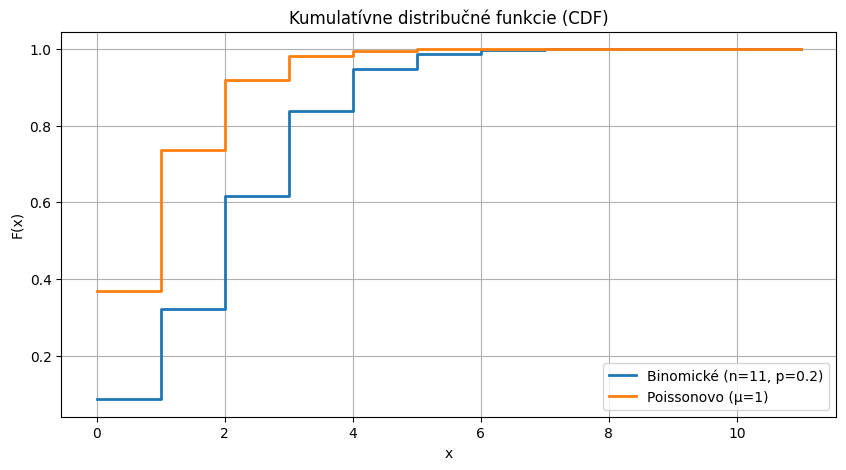

FSD podmienka je splnená pre všetky x.


In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, poisson

# -----------------------------------------------------------------
# 1) Parametre rozdelení
# -----------------------------------------------------------------
n_bin, p_bin = 11, 0.2
mu_pois = 1

# -----------------------------------------------------------------
# 2) Mreža pravdepodobností pre kvantilové funkcie
# -----------------------------------------------------------------
P = np.linspace(0.01, 0.99, 100)

# Kvantilové funkcie (PPF) binomálneho a Poissonovho rozdelenia
Q_bin = binom.ppf(P, n_bin, p_bin)
Q_pois = poisson.ppf(P, mu_pois)

# -----------------------------------------------------------------
# 3) Graf kvantilových funkcií
# -----------------------------------------------------------------
plt.figure(figsize=(10, 6))
plt.plot(P, Q_bin,
         label=f'Binomické (n={n_bin}, p={p_bin})',
         lw=2, linestyle='--')
plt.plot(P, Q_pois,
         label=f'Poissonovo (μ={mu_pois})',
         lw=2, linestyle='--')
plt.title('Kvantilové funkcie diskrétnych rozdelení')
plt.xlabel('Pravdepodobnosť P')
plt.ylabel('Kvantíl Q(P)')
plt.legend()
plt.grid(True)
plt.show()

# -----------------------------------------------------------------
# 4) SSD graf:  integrály kvantilových funkcií
# -----------------------------------------------------------------
int_bin = np.array([np.trapezoid(Q_bin[:i+1], P[:i+1]) for i in range(len(P))])
int_pois = np.array([np.trapezoid(Q_pois[:i+1], P[:i+1]) for i in range(len(P))])

plt.figure(figsize=(8, 5))
plt.plot(P, int_bin,
         label=f'∫ Q_bin (n={n_bin}, p={p_bin}) dt',
         lw=2)
plt.plot(P, int_pois,
         label=f'∫ Q_pois (μ={mu_pois}) dt',
         lw=2)
plt.title('SSD:  integrály kvantilových funkcií')
plt.xlabel('P')
plt.ylabel('Integrál od 0 do P')
plt.legend()
plt.grid(True)
plt.show()

# Formálna kontrola SSD
diff_int = int_bin - int_pois
if np.all(diff_int <= 1e-8):
    print(f"Binom(n={n_bin}, p={p_bin}) SSD-dominuje Poisson(μ={mu_pois}).")
elif np.all(diff_int >= -1e-8):
    print(f"Poisson(μ={mu_pois}) SSD-dominuje Binom(n={n_bin}, p={p_bin}).")
else:
    print("Žiadna SSD dominancia medzi rozdeleniami.")

# -----------------------------------------------------------------
# 5) CDF pre FSD a detekcia porušenia FSD
# -----------------------------------------------------------------
x_vals = np.arange(0, max(n_bin, mu_pois*4) + 1)  # rozsah od 0 do max

F_bin = binom.cdf(x_vals, n_bin, p_bin)
F_pois = poisson.cdf(x_vals, mu_pois)

plt.figure(figsize=(10, 5))
plt.step(x_vals, F_bin,  where='post',
         label=f'Binomické (n={n_bin}, p={p_bin})', lw=2)
plt.step(x_vals, F_pois, where='post',
         label=f'Poissonovo (μ={mu_pois})',      lw=2)
plt.title(' distribučné funkcie (CDF)')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.grid(True)

# Hľadanie prvého porušenia FSD: F_bin(x) <= F_pois(x)
diff_cdf = F_bin - F_pois
vio_idx = np.where(diff_cdf > 1e-8)[0]

if len(vio_idx) > 0:
    x0 = x_vals[vio_idx[0]]
    plt.axvline(x0, color='red', linestyle='--',
                label=f'Porušenie FSD pri x = {x0}')
    result = f"Žiadna FSD dominancia – prvé porušenie pri x = {x0}"
else:
    result = "FSD podmienka je splnená pre všetky x."

plt.legend()
plt.show()
print(result)
